Avinoam Blum First Targil June 19'

1. First task: Reading csv files, defining a df for each file

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
Donations_sample=pd.read_csv(r'C:\Users\Owner\GSTAT\ex-lessons-2-3\Donations_sample.csv')
Donors=pd.read_csv(r'C:\Users\Owner\GSTAT\ex-lessons-2-3\Donors.csv')
Projects_sample=pd.read_csv(r'C:\Users\Owner\GSTAT\ex-lessons-2-3\Projects_sample.csv')
Resources_sample=pd.read_csv(r'C:\Users\Owner\GSTAT\ex-lessons-2-3\Resources_sample.csv')
Schools=pd.read_csv(r'C:\Users\Owner\GSTAT\ex-lessons-2-3\Schools.csv')
Teachers=pd.read_csv(r'C:\Users\Owner\GSTAT\ex-lessons-2-3\Teachers.csv')

2. Second task: Printing shape of each df

In [2]:
print('Shape of the Donations_sample dataframe is:',Donations_sample.shape)
print('Shape of the Donors dataframe is',Donors.shape)
print('Shape of the Projects_sample dataframe is:',Projects_sample.shape)
print('Shape of the Resources_sample dataframe is:',Resources_sample.shape)
print('Shape of the Schools dataframe is:',Schools.shape)
print('Shape of the Donations_sample dataframe is:',Teachers.shape)

Shape of the Donations_sample dataframe is: (702978, 7)
Shape of the Donors dataframe is (2122640, 5)
Shape of the Projects_sample dataframe is: (55540, 18)
Shape of the Resources_sample dataframe is: (361004, 5)
Shape of the Schools dataframe is: (72993, 9)
Shape of the Donations_sample dataframe is: (402900, 3)


3. Third task: Creating a loop and printing variables which are of type int64

In [3]:
import glob
csv_files = glob.glob(r'C:\Users\Owner\GSTAT\ex-lessons-2-3\*.csv')
list_data = []
for filename in csv_files:
    data = pd.read_csv(filename)
    a=data.select_dtypes(['int64']).columns
    list_data.append(a)
   
print('list_of_int_vars:')

for item in list_data:
                   
        print(*item) 

list_of_int_vars:
Donor Cart Sequence

Teacher Project Posted Sequence

School Zip



4. Fourth task: Find missing values for each df

In [4]:
Donations_sample.isnull().sum(axis = 0).sort_values(ascending=False)

Donation Received Date                 0
Donor Cart Sequence                    0
Donation Amount                        0
Donation Included Optional Donation    0
Donor ID                               0
Donation ID                            0
Project ID                             0
dtype: int64

In [5]:
Donors.isnull().sum(axis = 0).sort_values(ascending=False)

Donor City          213097
Donor Zip           180060
Donor Is Teacher         0
Donor State              0
Donor ID                 0
dtype: int64

In [6]:
Projects_sample.isnull().sum(axis = 0).sort_values(ascending=False)

Project Fully Funded Date           14316
Project Resource Category               2
Project Subject Subcategory Tree        1
Project Subject Category Tree           1
Project Title                           1
Project Essay                           0
School ID                               0
Teacher ID                              0
Teacher Project Posted Sequence         0
Project Type                            0
Project Need Statement                  0
Project Short Description               0
Project Current Status                  0
Project Grade Level Category            0
Project Cost                            0
Project Posted Date                     0
Project Expiration Date                 0
Project ID                              0
dtype: int64

In [7]:
Resources_sample.isnull().sum(axis = 0).sort_values(ascending=False)

Resource Vendor Name    4039
Resource Unit Price     1259
Resource Quantity       1257
Resource Item Name        34
Project ID                 0
dtype: int64

In [8]:
Schools.isnull().sum(axis = 0).sort_values(ascending=False)

School Percentage Free Lunch    1141
School City                      227
School County                      2
School District                    0
School Zip                         0
School State                       0
School Metro Type                  0
School Name                        0
School ID                          0
dtype: int64

In [9]:
Teachers.isnull().sum(axis = 0).sort_values(ascending=False)

Teacher Prefix                       28
Teacher First Project Posted Date     0
Teacher ID                            0
dtype: int64

5. Fifth task: Find in Projects the max value of Project cost

In [10]:
Projects_sample['Project Cost'].max()

67664.72

6. Sixth task: Find in Projects the mean value of Project cost

In [11]:
Projects_sample['Project Cost'].mean()

744.5037855599566

7. Seventh task: Find in Projects the average value of Project cost

In [12]:
mea=Projects_sample['Project Cost'].mean() # average
med=Projects_sample['Project Cost'].median() # median
print(med)
print('Is the median smaller than the mean?',med<mea)

515.985
Is the median smaller than the mean? True


8. Eigth task: Find in Resources the 75th percentile value of Resource Quantity

In [13]:
Resources_sample['Resource Quantity'].quantile(0.75)

2.0

9. Ninth task: Find in Schools the unique values of 'School Name'

In [14]:
Schools['School Name'].nunique()

56831

10. Tenth task: Transform in Schools the variable 'School Percentage Free Lunch Name'  to float (remark-it was from the beginning float)

In [15]:
Schools['School Percentage Free Lunch']=Schools['School Percentage Free Lunch'].astype(float)

11. Eleventh task: merging all df

In [16]:
data=pd.merge(pd.merge(pd.merge(pd.merge(Projects_sample , Donations_sample , on='Project ID') , Donors , on='Donor ID') , Schools , on='School ID') , Teachers , on='Teacher ID')

12. Twelfth task: Shape of data

In [17]:
data.shape

(34706, 38)

13. Thirteenth task: Creating s which groupbys School State','Donation Amount' and find average

In [18]:
s=data.groupby(['School State','Donation Amount']).mean()

14. Fourteenth task: sort_values(ascending = False).head(10) = shows the states with the average highest donations: As we can see Hawaii is placed first 

In [19]:
s.sort_values(by= 'Donation Amount',ascending = False).head(10)

Teacher Project Posted Sequence  Project Cost  \
School State  Donation Amount                                                  
Hawaii        9999.25                                      3.0      11763.82   
California    8161.80                                      4.0       9602.12   
Georgia       7831.05                                      2.0       9223.00   
Arizona       7812.01                                      1.0       7812.01   
Florida       7489.20                                      1.0       8820.82   
Massachusetts 7100.00                                      1.0       7353.39   
California    7022.62                                      2.0       7022.62   
              6145.17                                      1.0       7229.61   
Virginia      6099.18                                      1.0       6099.18   
California    5289.95                                      1.0       6223.47   

                               Donor Cart Sequence  \
School State  Donation Amount                        
Hawaii        9999.25                          3.0   
California    8161.80                          2.0   
Georgia       7831.05                          2.0   
Arizona       7812.01                          1.0   
Florida       7489.20                          1.0   
Massachusetts 7100.00                          1.0   
California    7022.62                          1.0   
              6145.17                          1.0   
Virginia      6099.18                          1.0   
California    5289.95                          1.0   

                               School Percentage Free Lunch  School Zip  
School State  Donation Amount                                            
Hawaii        9999.25                                  36.0     96786.0  
California    8161.80                                   6.0     94960.0  
Georgia       7831.05                                  50.0     30328.0  
Arizona       7812.01                                  68.0     85201.0  
Florida       7489.20                                  65.0     32837.0  
Massachusetts 7100.00                                  72.0      1602.0  
California    7022.62                                  40.0     94040.0  
              6145.17                                  13.0     90720.0  
Virginia      6099.18                                  43.0     23229.0  
California    5289.95                                  13.0     90720.0

15. Fifteenth task: Graphs

Text(0, 0.5, 'States')

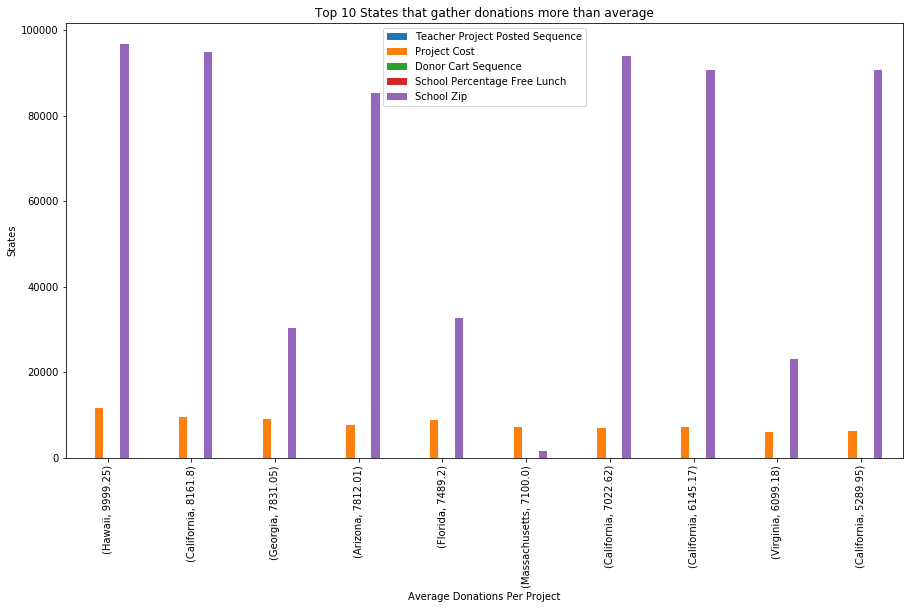

In [21]:
import matplotlib.pyplot as plt
data.groupby(['School State','Donation Amount']).mean().sort_values(by= 'Donation Amount',ascending = False).head(10).plot(kind='bar', title = 'Top 10 States that gather donations more than average',figsize=(15,8)) #c- title = 'Top 10 States that gather donations more than average'
plt.xlabel("Average Donations Per Project") # a
plt.ylabel("States") # b